# <span style="color:darkblue"> QTM 151 - Assignment 10 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [17]:
# Write your answer here

print("Sara Perez")


Sara Perez


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [18]:
# Write your answer here

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

In this assigment you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).

For this lecture, you will need the material from <br>
Lecture 20 and 22.


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [19]:
# Write your own code

df = pd.read_csv('/Users/saraperez/Documents/GitHub/QTM151_2024/assignment10/data_raw/exchangerates.csv')
df['date'] = pd.to_datetime(df['date_string'], format='%Y, %A, %b %d', errors='coerce') #parse the 'date_string' column and coerce errors 


print(df.head()) #checking results and data type 
print(df.dtypes)

#notes on date format 
#%Y is used for a four-digit year.
#%m is used for a two-digit month.
#%d is used for a two-digit day. 

               date_string  usd_to_rmb  usd_to_jpy       date
0     1981, Friday, Jan 02      1.5341      202.50 1981-01-02
1     1981, Monday, Jan 05      1.5418      199.05 1981-01-05
2    1981, Tuesday, Jan 06      1.5264      199.70 1981-01-06
3  1981, Wednesday, Jan 07      1.5264      201.05 1981-01-07
4   1981, Thursday, Jan 08      1.5264      201.70 1981-01-08
date_string            object
usd_to_rmb            float64
usd_to_jpy            float64
date           datetime64[ns]
dtype: object


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


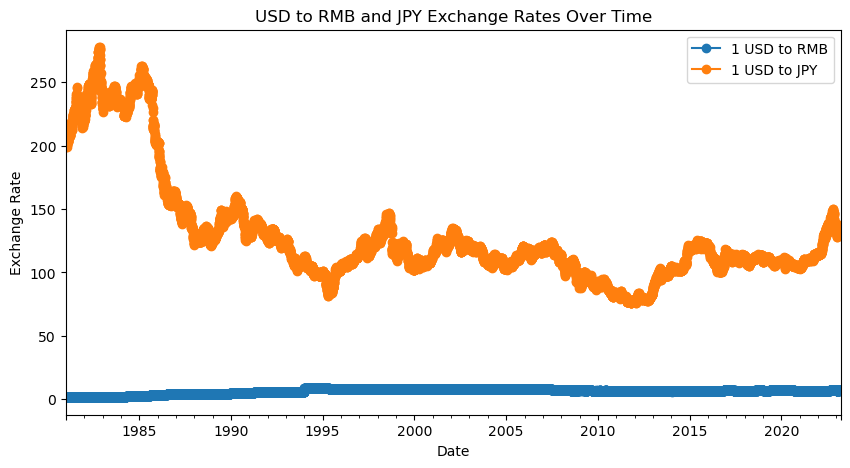

In [20]:
# Write your own code

df.set_index('date', inplace=True)
 
ax = df[['usd_to_rmb', 'usd_to_jpy']].plot(kind='line', figsize=(10, 5), marker='o', linestyle='-') #plot data 
 
# set the labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Exchange Rate")
ax.set_title("USD to RMB and JPY Exchange Rates Over Time")


ax.legend(["1 USD to RMB", "1 USD to JPY"])

plt.show()



In [15]:
print(df.columns)

Index(['usd_to_rmb', 'usd_to_jpy'], dtype='object')


<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- Create a boolean vector (True/False) "bool_cond" which checks whether <br>
"usd_to_jpy" is below 100
- Generate a line plot with the "usd_to_jpy" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



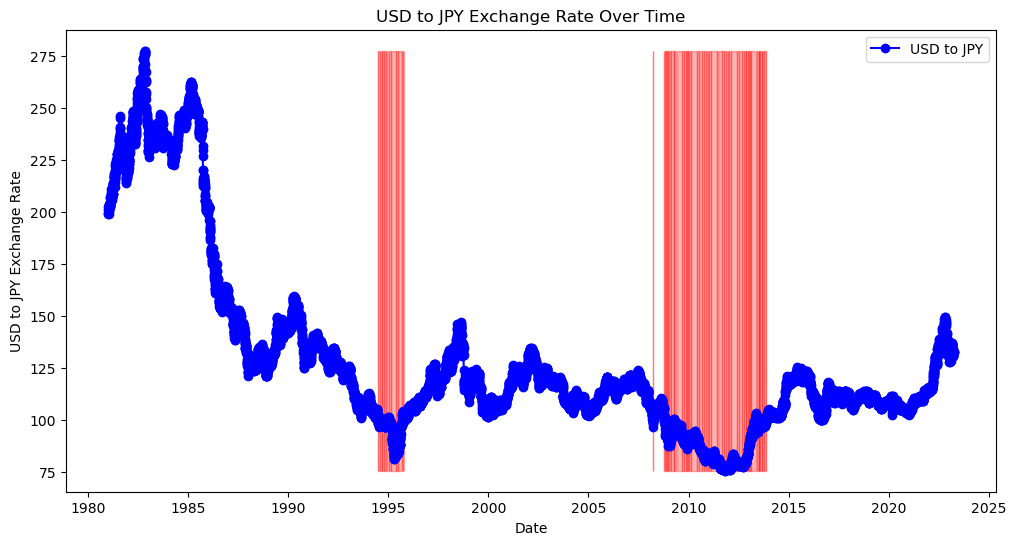

In [24]:
# Write your own code

df['date'] = pd.to_datetime(df['date_string'], format='%Y, %A, %b %d', errors='coerce')

df.set_index('date', inplace=True)


df['bool_cond'] = df['usd_to_jpy'] < 100 #boolean vector wehre usd_to_jpy is <100 

#plot 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['usd_to_jpy'], label='USD to JPY', marker='o', linestyle='-', color='blue')
plt.xlabel("Date")
plt.ylabel("USD to JPY Exchange Rate")
plt.title("USD to JPY Exchange Rate Over Time")

# fill_between to shade regions where 'usd_to_jpy' is below 100
plt.fill_between(df.index, 
                 y1=df['usd_to_jpy'].min(), 
                 y2=df['usd_to_jpy'].max(), 
                 where=df['bool_cond'], 
                 color='red', 
                 alpha=0.3)

plt.legend()

plt.show()

#explanation: 
#Plotting: The usd_to_jpy series is plotted as a line chart. The plt.plot() function is used, specifying the x-values (df.index), y-values (df['usd_to_jpy']), and line style.
#Boolean Vector (bool_cond): This vector is true where the USD to JPY rate is below 100.
#Shading with plt.fill_between(): This function shades areas of the plot. 
#The parameters y1 and y2 are set to the minimum and maximum of the 'usd_to_jpy' series respectively, ensuring the shaded region covers the full vertical span of the plot during the periods defined by bool_cond.



<font size = "5">

(d) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [26]:
# Write your own code

#check index because of earlier error in b andc 

if 'date' not in df.index.names:
    df.set_index('date', inplace=True)

# Grouper object to group data by month
month_config = pd.Grouper(freq='M')

# compute the standard deviation of 'usd_to_rmb' by month
monthly_std_dev = df['usd_to_rmb'].groupby(month_config).std()

print(monthly_std_dev)

#explanations: 
#pd.Grouper(): This function is used to specify how you want to group the data. Here, freq='M' groups the data by the end of each calendar month.
#Aggregation: groupby(month_config).std() computes the standard deviation of the "usd_to_rmb" values for each month.
#This method is applied to the 'usd_to_rmb' column, which needs to be correctly named in your DataFrame.
#Result: The result is a Series indexed by the end of each month with the standard deviation of the exchange rates for that month. 


date
1981-01-31    0.019149
1981-02-28    0.015432
1981-03-31    0.012636
1981-04-30    0.017154
1981-05-31    0.017583
                ...   
2022-11-30    0.077405
2022-12-31    0.028203
2023-01-31    0.052152
2023-02-28    0.067344
2023-03-31    0.034796
Freq: M, Name: usd_to_rmb, Length: 507, dtype: float64


<font size = "5">

(e) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [30]:
# Write your own code

#conver data frame to long format 
df_long = pd.melt(df, 
                  id_vars='date_string', 
                  value_vars=['usd_to_rmb', 'usd_to_jpy'],
                  var_name='type', 
                  value_name='exchange_rate')


print(df_long)


#date column error 

#explanations: 
#pd.melt(): This function is used for unpivoting the DataFrame from wide format to long format.
#id_vars: Specifies the column(s) that will remain in the resulting DataFrame, serving as identifiers. Here, 'date' is used as the identifier.
#value_vars: Lists the columns to unpivot. In this case, 'usd_to_rmb' and 'usd_to_jpy' are the columns containing the values that need to be unpivoted.
#var_name and value_name: Specifies the names for the new columns in the melted DataFrame. 'type' will contain the names of the currencies ('usd_to_rmb', 'usd_to_jpy'), 
#and 'exchange_rate' will contain the corresponding values.


                   date_string        type  exchange_rate
0         1981, Friday, Jan 02  usd_to_rmb         1.5341
1         1981, Monday, Jan 05  usd_to_rmb         1.5418
2        1981, Tuesday, Jan 06  usd_to_rmb         1.5264
3      1981, Wednesday, Jan 07  usd_to_rmb         1.5264
4       1981, Thursday, Jan 08  usd_to_rmb         1.5264
...                        ...         ...            ...
22037     2023, Monday, Mar 27  usd_to_jpy       131.4900
22038    2023, Tuesday, Mar 28  usd_to_jpy       130.9700
22039  2023, Wednesday, Mar 29  usd_to_jpy       132.6900
22040   2023, Thursday, Mar 30  usd_to_jpy       132.7100
22041     2023, Friday, Mar 31  usd_to_jpy       132.7500

[22042 rows x 3 columns]
